In [1]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

### pandas and numpy
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

### punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import en_core_web_sm
nlp = en_core_web_sm.load()
import scattertext as st

### textblob
from textblob import TextBlob

### countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE

### gensim
import gensim
from gensim import models

### PCA
import random
from adjustText import adjust_text

### plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### kMeans and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### ignore warnings
import warnings
warnings.filterwarnings('ignore')

###time
from datetime import datetime

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


# 1. DATA CLEANING

In [2]:
###' ################################################################################
###'
###' Data Load 
###'
###'

### daata load
df= pd.read_csv("data/5_166(2000-2009).csv")
df.head(5)


df_S = df[['Authors','Title','Year','Volume','Abstract']]
df_clean = df_S.dropna(subset = ['Title','Abstract'])

spell = SpellChecker()
df_clean['Title_spell'] = df_clean['Title'].map(lambda x: spell.correction(x))
df_clean['Abstract_spell'] = df_clean['Abstract'].map(lambda x: spell.correction(x))
df_clean.head(5)

,Authors,Title,Year,Volume,Abstract,Title_spell,Abstract_spell
0,Güler N.; Penfield R.D.,A comparison of the logistic regression and co...,2009,46,"In this study, we investigate the logistic reg...",A comparison of the logistic regression and co...,"In this study, we investigate the logistic reg..."
1,Kim S.,A comparative study of IRT fixed parameter cal...,2006,43,This article provides technical descriptions o...,A comparative study of IRT fixed parameter cal...,This article provides technical descriptions o...
2,Dorans N.J.,Using subpopulation invariance to assess test ...,2004,41,"Score equity assessment (SEA) is introduced, a...",Using subpopulation invariance to assess test ...,"Score equity assessment (SEA) is introduced, a..."
3,Finch H.,Comparison of the performance of varimax and p...,2006,43,Nonlinear factor analysis is a tool commonly u...,Comparison of the performance of varimax and p...,Nonlinear factor analysis is a tool commonly u...
4,Meyer J.P.; Setzer J.C.,A comparison of bridging methods in the analys...,2009,46,Recent changes to federal guidelines for the c...,A comparison of bridging methods in the analys...,Recent changes to federal guidelines for the c...


In [3]:
###' ################################################################################
###'
###' Function for Deleteing Punctuations and StopWords
###'
###'

### define fuction
def rem_punc_stop(text):
    
    # when text is None
    if text is None:  
        return None
    
    # add more stop words
    stop_words = STOP_WORDS 
    nlp.Defaults.stop_words |= {"use","education","measurement","model","Education","Measurement","Model"}
    
    punc = set(punctuation)
    
    
    # remove the punctuation
    punc_free = "".join([ch for ch in text if ch not in punc])                                                               

    # apply nlp to punctuation-free object
    doc = nlp(punc_free)
    
    # lemmatize
    text_lemma = " ".join([word.lemma_ for word in doc])
    
    # extract words from processed text 
    spacy_words = text_lemma.split()
    spacy_words_1 = [word for word in spacy_words if not word.startswith(".")]
    spacy_words_2 = [word for word in spacy_words_1 if not word.startswith(".")]
    
    
    # filter out words 
    no_stop = [word for word in spacy_words_2 if word not in stop_words]
    
    # return
    return no_stop

In [4]:
###' ################################################################################
###'
###' Apply the Function and Tokenize Text Column
###'
###'

# tokenize
df_clean['A_tokens'] = df_clean['Abstract_spell'].map(lambda x: rem_punc_stop(x))
df_clean['T_tokens'] = df_clean['Title_spell'].map(lambda x: rem_punc_stop(x))

df_clean['A_tokens']
df_clean['T_tokens']

0      [comparison, logistic, regression, contingency...
1      [comparative, study, IRT, fix, parameter, cali...
2      [subpopulation, invariance, assess, test, scor...
3      [comparison, performance, varimax, promax, rot...
4      [comparison, bridge, method, analysis, naep, t...
                             ...                        
161    [construct, universal, scale, high, school, co...
162    [apply, LiuAgresti, Estimator, Cumulative, Com...
163                                                 None
164    [Monte, Carlo, base, null, distribution, alter...
165    [standardsbased, scoring, traditional, grade, ...
Name: T_tokens, Length: 166, dtype: object

# 2. WORD CLOUDS

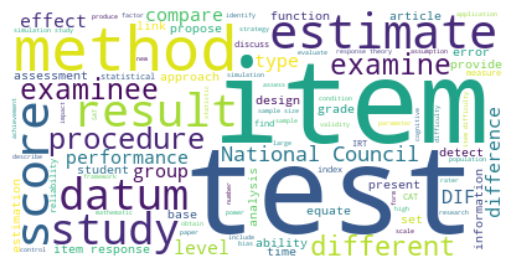

In [5]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###'
###'

### 1. Abstract

# apply function to text object
TO_text = ' '.join(df_clean['A_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                              

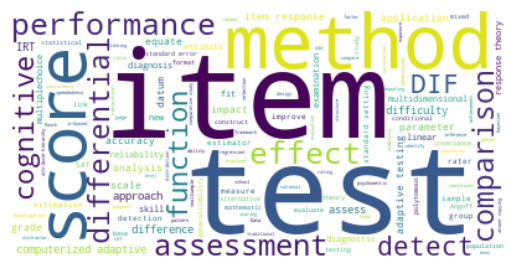

In [6]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###'
###'

### 2. Title

# apply function to text object
TO_text = ' '.join(df_clean['T_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                              

# 3. WORDS FREQUENCY

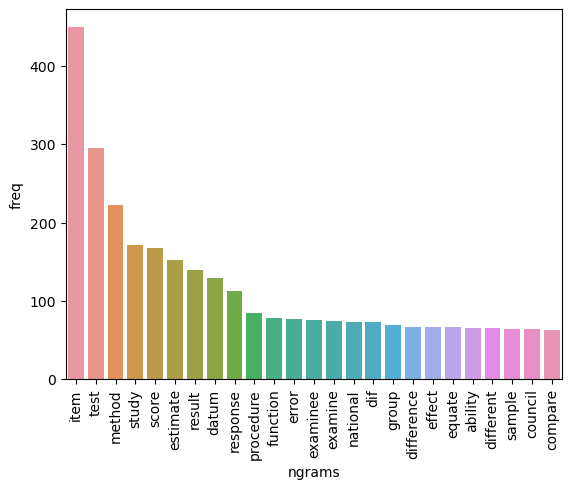

In [7]:
###' ################################################################################
###'
###' VISUALIZATION : WORDS COUNT
###' _ unigrams
###'
###'

### join token
df_clean['A_tokens_join'] = df_clean['A_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
df_clean['T_tokens_join'] = df_clean['T_tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")


### most frequent unigrams _____ Abstract one word
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_clean['A_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

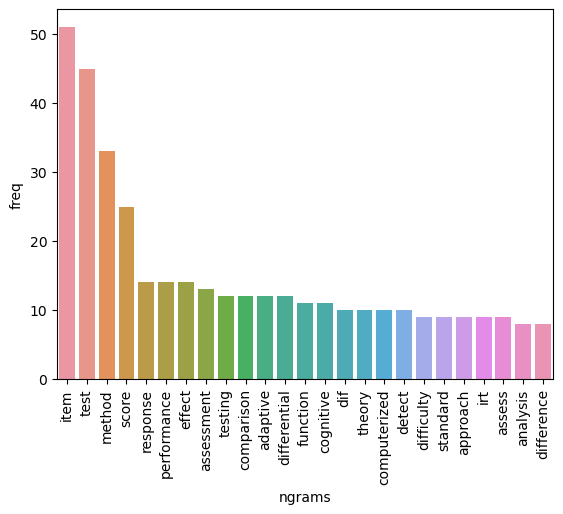

In [8]:
### most frequent unigrams  _____ Title one word
countvec = CountVectorizer(min_df = 5, ngram_range=(1,1))
ngrams = countvec.fit_transform(df_clean['T_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

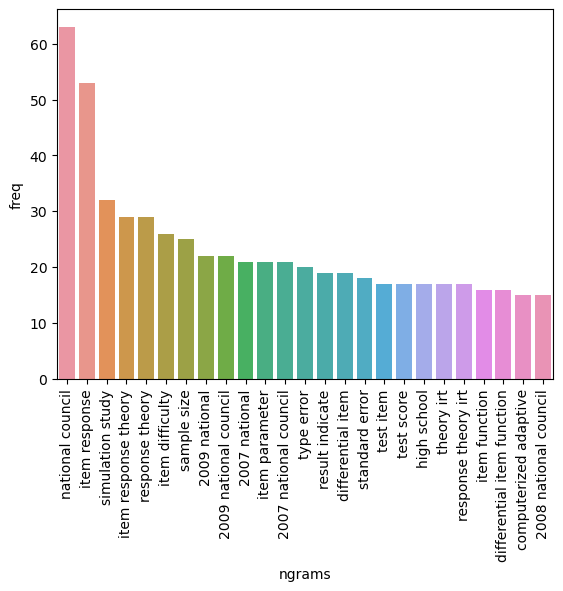

In [9]:
### most frequent bigrams _____ Abstract two words
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))
ngrams = countvec.fit_transform(df_clean['A_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

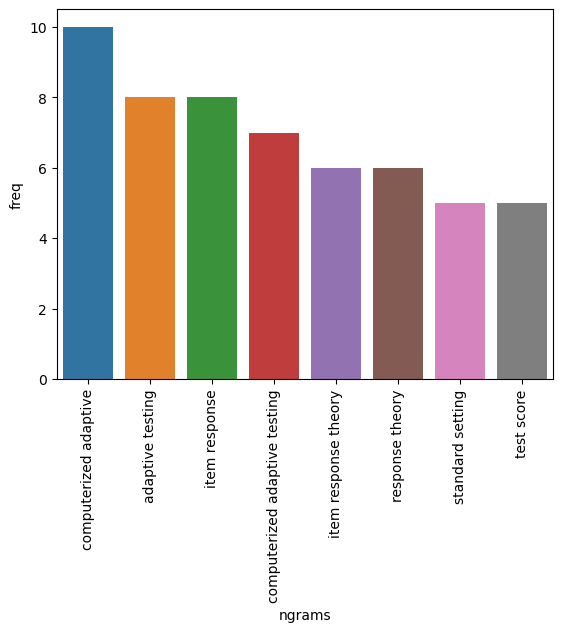

In [10]:
### most frequent bigrams _____ Abstract two words
countvec = CountVectorizer(min_df = 5, ngram_range=(2,3))
ngrams = countvec.fit_transform(df_clean['T_tokens_join'])      


### create a dataframe 
dictionary_dataframe = pd.DataFrame(ngrams.todense(),
                                    columns = countvec.get_feature_names_out()) 


### organize a dataframe 
df_ngram = pd.DataFrame(dictionary_dataframe.sum().reset_index()).rename(columns={'index': 'ngrams', 0:'freq'})
df_ngram = df_ngram.sort_values(by = ['freq'], 
                                ascending = False).reset_index()


### plot 
sns.barplot(x="ngrams", 
            y = "freq",
            data=df_ngram[0:25])
plt.xticks(rotation=90)
plt.show()

# 4. TOPIC MODELING

In [11]:
###' ################################################################################
###'
###' Topic Modeling : TD-IDF Matrix
###'
###'


### 1. Abstract

### create tf-idf matrix
tfidf = TfidfVectorizer(min_df = 5) 
tfidf_mx_a = tfidf.fit_transform(df_clean['A_tokens_join'])



### convert matrix to an arrray and then to a dataframe
tfidf_df_a = pd.DataFrame(data = tfidf_mx_a.toarray(),
                        columns = tfidf.get_feature_names_out())

## sort by term frequency on the first document
tfidf_df_a.T.nlargest(10,0)

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
dif,0.357902,0.0,0.000000,0.0,0.000000,0.0,0.240547,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.335442,0.000000,0.358416,0.0,0.000000,0.0
rate,0.340809,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
decision,0.289842,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
type,0.287379,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
error,0.256297,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.169417,0.0,0.0,0.049877,0.080071,0.000000,0.000000,0.0,0.000000,0.0
power,0.252080,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
assess,0.214317,0.0,0.093876,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.107312,0.0,0.248009,0.0
high,0.200839,0.0,0.000000,0.0,0.065988,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.370257,0.000000,0.0,0.000000,0.0
rule,0.154210,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.090031,0.000000,0.000000,0.000000,0.0,0.000000,0.0
simultaneous,0.154210,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [12]:
###' ################################################################################
###'
###' Topic Modeling : Latent Dirichlet Allocation (LDA)
###'
###'


### define function
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nlda_{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    

In [13]:
# Latent Dirichlet Allocation (LDA)
# ---------------------------------------

# pre-processing
X = df_clean['A_tokens_join']

tf = TfidfVectorizer(tokenizer = rem_punc_stop,
                     token_pattern = None) 

tfidf_mx =  tf.fit_transform(X)

dense_matrix = tfidf_mx.todense()


# initialize LDA and set model parameters
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=20,  
                                random_state=0) 

# fit LDA model to our dense matrix
lda = lda.fit(numpy.asarray(dense_matrix))

# post-processing
tf_feature_names = tf.get_feature_names_out()

In [14]:
### print top words 
print_top_words(lda, tf_feature_names, 20)

### join
col_names = ['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4']
topic_dist = lda.transform(tfidf_mx)
topic_dist_lda = pd.DataFrame(lda.transform(tfidf_mx),
                              columns = col_names)


df_clean = df_clean.join(topic_dist_lda)


lda_0:
fairness continuous professional farr standardsbase book trumbull edit e scoring pay backward glance practice summarize review century b traditional grade

lda_1:
itbs cubic bspline smoothing diagrams polynomial rmse thousand capitalization postsmoothe map beta4 material presmoothing spline 1000 modification 300 area presmoothe

lda_2:
judgment assembly angoff em section weight cycle solution itemmappe mem oem subtopic correlation course lp standardsette instruction cut cdm assembler

lda_3:
item method test score estimate equate datum procedure study response result examinee error ability irt sample examine link dif effect

lda_4:
rater school grade dif function invariance estimator differential teacher test item student high achievement study sit anchor hglm group result



In [15]:
###' ################################################################################
###'
###' Topic Modeling : on-Negative Matrix Factorization (NMF)
###'
###'


# pre-processing
Y = df_clean['A_tokens_join']

tf = TfidfVectorizer(tokenizer = rem_punc_stop,
                     token_pattern = None) 

tfidf_mx =  tf.fit_transform(Y)
dense_matrix = tfidf_mx.todense()


# initialize LDA and set model parameters
nmf = NMF(n_components=5,  # specify the number of components
          init='random',   # specify the initalization method
          random_state=1)  # set a seed for reproducibility

# fit NMF model to our dense matrix
nmf = nmf.fit(numpy.asarray(dense_matrix))

# post-processing
tf_feature_names = tf.get_feature_names_out()

In [16]:
### print top words 
print_top_words(nmf, tf_feature_names,20)  

### join
col_names2 = ['nmf_0', 'nmf_1', 'nmf_2', 'nmf_3', 'nmf_4']
topic_dist_nmf = pd.DataFrame(nmf.transform(tfidf_mx),
                              columns = col_names2)

df_clean = df_clean.join(topic_dist_nmf)


lda_0:
dif item test estimator function detection differential power I impact group sibt polytomous type effect statistical index propose mantelhaenszel study

lda_1:
procedure score reliability attribute cognitive ahm datum psychometric estimate performance irt approach theory describe diagnostic sample expert generalizability provide assumption

lda_2:
equate method score anchor function link population test sample equipercentile result form pass small testlet linear distribution presmoothe ke chain

lda_3:
item method exposure cat estimate test ability parameter response control examinee rate difficulty maximum link time result estimation fit adaptive

lda_4:
grade school student teacher achievement rater high variation difference group score sit performance measure subject average analysis large mathematic study



In [17]:
###' ################################################################################
###'
###' Word Embedding : Word2VecModel
###'
###'


### drop na
tweets_party = df_clean[df_clean['A_tokens'].notna()]

### Train Word2VecModel
model = gensim.models.Word2Vec(df_clean['A_tokens'].tolist(),
                               vector_size = 150, 
                               window = 5, 
                               min_count = 5, 
                               sg = 0, 
                               alpha = 0.025,
                               epochs = 5,
                               seed = 224,
                               batch_words = 10000,
                               workers = 1)

### return list of words
words = list(model.wv.index_to_key)
print(words[0:50]) 

['item', 'test', 'method', 'score', 'study', 'estimate', 'result', 'datum', 'response', 'procedure', 'error', 'function', 'examine', 'examinee', 'National', 'difference', 'equate', 'effect', 'group', 'different', 'ability', 'Council', 'compare', 'sample', '©', 'level', 'performance', 'simulation', 'DIF', 'approach', 'student', 'parameter', 'set', 'present', 'IRT', 'grade', 'base', 'theory', 'article', 'difficulty', 'analysis', 'provide', 'estimation', 'high', 'rate', 'link', 'type', 'school', 'information', 'propose']


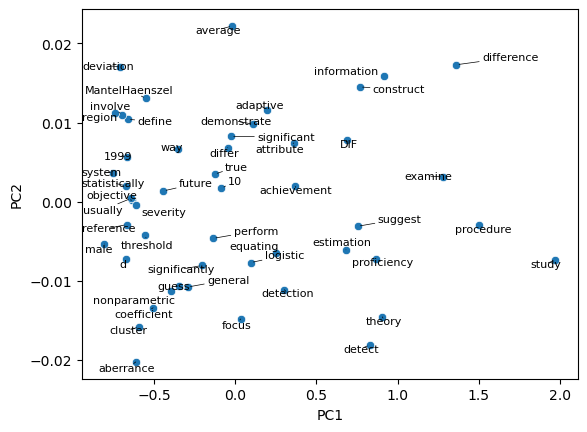

In [18]:
###' ################################################################################
###'
###' Word Embedding : Principal Component Analysis (PCA)
###'
###'


### take random sample
rando = random.sample(list(model.wv.index_to_key), 50) 
X1 = model.wv.__getitem__(rando)

### initalize PCA
pca1 = PCA(n_components=2)
result = pca1.fit_transform(X1)

### convert to dataframe 
result_df = pd.DataFrame(result,                  
                         columns = ['PC1', 'PC2'],
                         index = rando)   

### create scatterplot
sns.scatterplot(x = 'PC1',         # specify x-axis
                y = 'PC2',         # specify y-axis
                data = result_df)  # specify data

### initialize empty list
texts = []

### append words to list
for word in result_df.index:
    texts.append(plt.text(result_df.loc[word, 'PC1'], 
                          result_df.loc[word, 'PC2'], 
                          word, 
                          fontsize = 8))
    
### adjust plot text to prevent overlapping 
adjust_text(texts, 
            force_text = (0.4,0.4),
            expand = (1.2,1),
            arrowprops = dict(arrowstyle = "-", 
                              color = 'black', 
                              lw = 0.5))

### plot 
plt.show();

  File "D:\Program\ANACONDA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


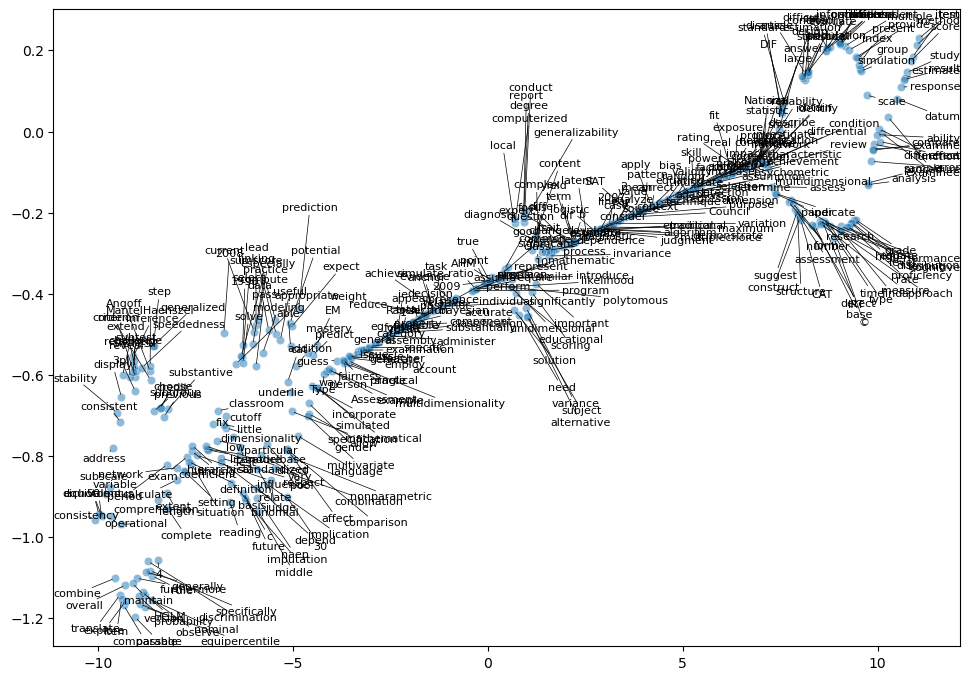

In [19]:
###' ################################################################################
###'
###' Word Embedding : t-SNE
###'
###'


### preprocessing
vector_list = [model.wv.__getitem__(word) for word in words if word in model.wv.index_to_key]
words_filtered = [word for word in words if word in model.wv.index_to_key]
word_vec_zip = zip(words_filtered, vector_list)


### create a dictionary and save as a dataframe
word_vec_dict = dict(word_vec_zip)
word_vec_df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
word_vec_df.shape


### initialize t-SNE
tsne = TSNE(n_components = 2,  # specify 2 components
            init = 'random',   # set initalization
            random_state = 10, # set seed
            perplexity = 100)  # set preplexity threshold


### subset to only 400 rows to speed up training time
tsne_df = tsne.fit_transform(word_vec_df[:400])


### figure specifications
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(x = tsne_df[:, 0], 
                y = tsne_df[:, 1], 
                alpha = 0.5)


### Convert tsne_df to DataFrame
tsne_df = pd.DataFrame(tsne_df, index=words_filtered[:400], columns=['PC1', 'PC2'])

### Initialize empty list
texts = []

### Append words to list using loop
for word in tsne_df.index:
    texts.append(plt.text(tsne_df.loc[word, 'PC1'], 
                          tsne_df.loc[word, 'PC2'], 
                          word, 
                          fontsize = 8))

### Adjust plot text to prevent overlapping 
adjust_text(texts, 
            force_text = (0.4,0.4),
            expand = (1.2,1),
            arrowprops = dict(arrowstyle = "-", 
                              color = 'black', 
                              lw = 0.5))

plt.show()

In [20]:
csv_file_path = 'data/5_output.csv'
df_clean.to_csv(csv_file_path, index=False)